In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


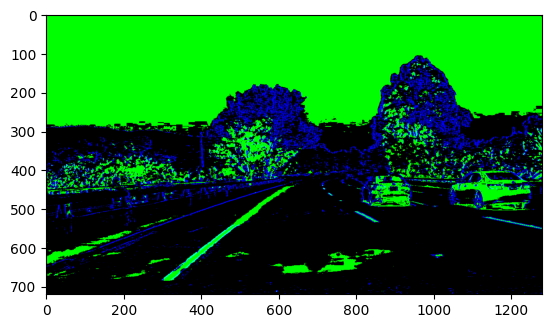

In [66]:
def pipeline(image, s_thres=(100, 255), sx_thres=(20, 100)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    l = hls[:, :, 1]
    s = hls[:, :, 2]
    
    sobelx = cv2.Sobel(l, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    sx_binary = np.zeros_like(scaled_sobel)
    sx_binary[(scaled_sobel >= sx_thres[0]) & (scaled_sobel <= sx_thres[1])] = 1
    
    s_binary = np.zeros_like(s)
    s_binary[(s > s_thres[0]) & (s <= s_thres[1])] = 1
    
    # combined_binary = np.zeros_like(s)
    # combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1
    combined_binary = np.dstack((np.zeros_like(s_binary), s_binary, sx_binary)) * 255
    return combined_binary

image = mpimg.imread("test4.jpg")
thres_image = pipeline(image)
plt.imshow(thres_image)

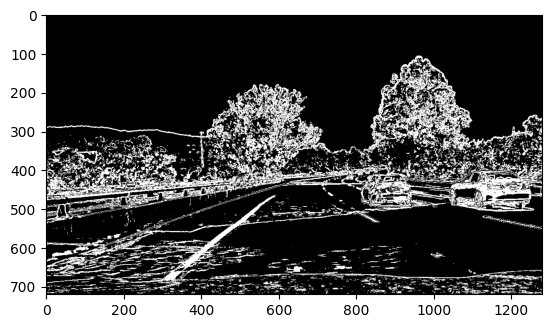

In [74]:
def pipeline(image, s_thres=(150, 255), sx_thres=(20, 100)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    l = hls[:, :, 1]
    s = hls[:, :, 2]
    
    sobelx = cv2.Sobel(l, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(l, cv2.CV_64F, 0, 1)
    
    abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    
    sx_binary = np.zeros_like(scaled_sobelxy)
    sx_binary[(scaled_sobelxy >= sx_thres[0]) & (scaled_sobelxy <= sx_thres[1])] = 1
    
    s_binary = np.zeros_like(s)
    s_binary[(s > s_thres[0]) & (s <= s_thres[1])] = 1
    
    combined_binary = np.zeros_like(s)
    combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1
    # combined_binary = np.dstack((np.zeros_like(s_binary), s_binary, sx_binary)) * 255
    return combined_binary

image = mpimg.imread("test4.jpg")
thres_image = pipeline(image)
plt.imshow(thres_image, cmap='gray')

Text(0.5, 1.0, 'v')

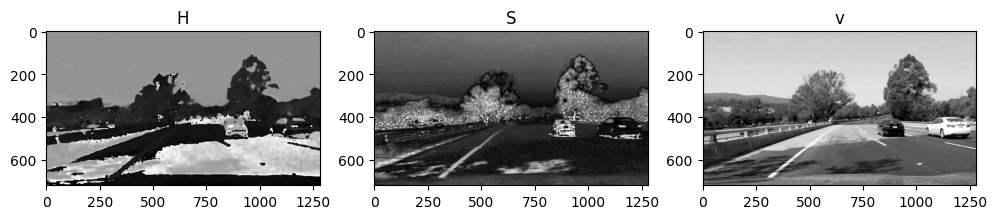

In [63]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 12))
ax1.imshow(h, cmap="gray")
ax1.set_title("H")
ax2.imshow(s, cmap="gray")
ax2.set_title("S")
ax3.imshow(v, cmap="gray")
ax3.set_title("v")